In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('brasileirao_serie_a.csv.gz')

Saving brasileirao_serie_a.csv.gz to brasileirao_serie_a.csv.gz


In [10]:
df = pd.read_csv('brasileirao_serie_a.csv.gz')

In [11]:
print("Primeiras linhas do dataset:")
print(df.head())
print("\nResumo dos tipos de dados:")
print(df.dtypes)

Primeiras linhas do dataset:
   ano_campeonato        data  rodada      estadio  \
0            2017  2017-05-21       2  Arena Condá   
1            2017  2017-05-30       3  Arena Condá   
2            2017  2017-06-09       5  Arena Condá   
3            2017  2017-06-15       7  Arena Condá   
4            2017  2017-06-18       8  Arena Condá   

                              arbitro  publico  publico_max time_mandante  \
0        André Luiz de Freitas Castro  10323.0      22600.0   Chapecoense   
1            Marcelo de Lima Henrique   6188.0      22600.0   Chapecoense   
2              Rodolpho Toski Marques  14403.0      22600.0   Chapecoense   
3              Jailson Macedo Freitas  10033.0      22600.0   Chapecoense   
4  Marcelo Aparecido Ribeiro de Souza  11603.0      22600.0   Chapecoense   

  time_visitante tecnico_mandante  ... chutes_bola_parada_mandante  \
0      Palmeiras   Vágner Mancini  ...                         NaN   
1        Avaí FC   Vágner Mancini  ...     

In [12]:
print("\nValores nulos antes da limpeza:")
print(df.isnull().sum())


Valores nulos antes da limpeza:
ano_campeonato                       0
data                                 0
rodada                               0
estadio                             11
arbitro                           1710
publico                           1711
publico_max                       4262
time_mandante                        0
time_visitante                       0
tecnico_mandante                  2153
tecnico_visitante                 2153
colocacao_mandante                1710
colocacao_visitante               1710
valor_equipe_titular_mandante     2098
valor_equipe_titular_visitante    2098
idade_media_titular_mandante      2100
idade_media_titular_visitante     2100
gols_mandante                        1
gols_visitante                       1
gols_1_tempo_mandante             1720
gols_1_tempo_visitante            1720
escanteios_mandante               6291
escanteios_visitante              6291
faltas_mandante                   6291
faltas_visitante               

In [27]:
df['data'] = pd.to_datetime(df['data'], errors='coerce')
df.fillna({'publico': df['publico'].mean(), 'publico_max': df['publico_max'].mean()}, inplace=True)
df.dropna(inplace=True)

In [28]:
print("\nValores nulos após a limpeza:")
print(df.isnull().sum())
print("\nDescrição estatística do dataset:")
print(df.describe())


Valores nulos após a limpeza:
ano_campeonato                    0
data                              0
rodada                            0
estadio                           0
arbitro                           0
publico                           0
publico_max                       0
time_mandante                     0
time_visitante                    0
tecnico_mandante                  0
tecnico_visitante                 0
colocacao_mandante                0
colocacao_visitante               0
valor_equipe_titular_mandante     0
valor_equipe_titular_visitante    0
idade_media_titular_mandante      0
idade_media_titular_visitante     0
gols_mandante                     0
gols_visitante                    0
gols_1_tempo_mandante             0
gols_1_tempo_visitante            0
escanteios_mandante               0
escanteios_visitante              0
faltas_mandante                   0
faltas_visitante                  0
chutes_bola_parada_mandante       0
chutes_bola_parada_visitante     

In [29]:
df.columns = df.columns.str.strip()


In [30]:
# Pergunta 1: Qual time teve a maior média de público durante o campeonato?
media_publico = df.groupby('time_mandante')['publico'].mean().sort_values(ascending=False)
time_maior_publico = media_publico.idxmax()
print(f"\nTime com maior média de público: {time_maior_publico}")



Time com maior média de público: Flamengo


In [31]:
# Pergunta 2: Existe correlação entre o valor da equipe titular e o número de gols marcados?
corr_valor_gols = df['valor_equipe_titular_mandante'].corr(df['gols_mandante'])
print(f"\nCorrelação entre valor da equipe titular e gols marcados: {corr_valor_gols:.2f}")


Correlação entre valor da equipe titular e gols marcados: 0.16


In [32]:
# Pergunta 3: Qual é a média de idade dos jogadores dos times com maior colocação?
media_idade = df.groupby('colocacao_mandante')['idade_media_titular_mandante'].mean()
print("\nMédia de idade dos jogadores por colocação:")
print(media_idade)



Média de idade dos jogadores por colocação:
colocacao_mandante
1.0     71.711765
2.0     68.674684
3.0     76.927711
4.0     65.915789
5.0     73.128723
6.0     64.921348
7.0     66.350000
8.0     60.319540
9.0     82.263441
10.0    74.647500
11.0    76.935443
12.0    77.788889
13.0    73.800000
14.0    56.618605
15.0    68.321505
16.0    64.962500
17.0    62.308602
18.0    69.128261
19.0    73.292593
20.0    67.225581
Name: idade_media_titular_mandante, dtype: float64


In [33]:
# Pergunta 4: O fator casa influencia na quantidade de gols marcados?
gols_casa = df.groupby('time_mandante')['gols_mandante'].mean()
gols_fora = df.groupby('time_visitante')['gols_visitante'].mean()
diferenca_gols = gols_casa.mean() - gols_fora.mean()
print(f"\nInfluência do fator casa: {diferenca_gols:.2f} gols a mais em média.")



Influência do fator casa: 0.43 gols a mais em média.


In [34]:
# Pergunta 5: Qual árbitro apitou mais jogos?
arbitro_mais_frequente = df['arbitro'].value_counts().idxmax()
print(f"\nÁrbitro com mais jogos apitados: {arbitro_mais_frequente}")


Árbitro com mais jogos apitados: Raphael Claus


In [35]:
# Pergunta 6: Times com maior número de escanteios têm mais vitórias?
df['vitoria_mandante'] = (df['gols_mandante'] > df['gols_visitante']).astype(int)
correlacao_escanteios_vitorias = df['escanteios_mandante'].corr(df['vitoria_mandante'])
print(f"\nCorrelação entre escanteios e vitórias: {correlacao_escanteios_vitorias:.2f}")


Correlação entre escanteios e vitórias: -0.06


In [36]:
# Pergunta 7: Qual foi o estádio mais utilizado durante o campeonato?
estadio_mais_utilizado = df['estadio'].value_counts().idxmax()
print(f"\nEstádio mais utilizado: {estadio_mais_utilizado}")


Estádio mais utilizado: Estádio Jornalista Mário Filho


In [37]:
# Pergunta 8: Há relação entre idade média dos titulares e faltas cometidas?
corr_idade_faltas = df['idade_media_titular_mandante'].corr(df['faltas_mandante'])
print(f"\nCorrelação entre idade média dos titulares e faltas cometidas: {corr_idade_faltas:.2f}")




Correlação entre idade média dos titulares e faltas cometidas: -0.01


In [38]:
# Pergunta 9: Times com maior valor de elenco são mais bem colocados na tabela?
corr_valor_colocacao = df['valor_equipe_titular_mandante'].corr(df['colocacao_mandante'])
print(f"\nCorrelação entre valor do elenco e colocação: {corr_valor_colocacao:.2f}")


Correlação entre valor do elenco e colocação: -0.42


In [39]:
# Pergunta 10: O público total é influenciado pela colocação dos times?
corr_publico_colocacao = df['publico'].corr(df['colocacao_mandante'])
print(f"\nCorrelação entre público e colocação: {corr_publico_colocacao:.2f}")


Correlação entre público e colocação: -0.26


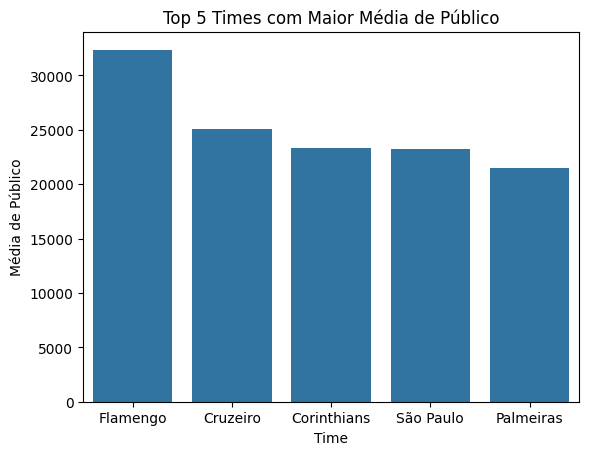

In [40]:
# Visualizações para Respostas às Perguntas
sns.barplot(x=media_publico.index[:5], y=media_publico.values[:5])
plt.title('Top 5 Times com Maior Média de Público')
plt.xlabel('Time')
plt.ylabel('Média de Público')
plt.show()

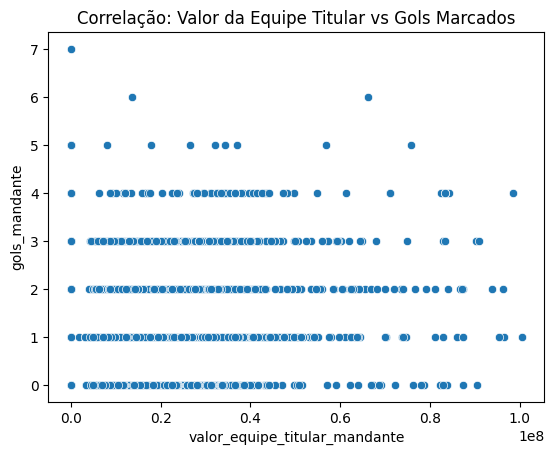

In [41]:
sns.scatterplot(x='valor_equipe_titular_mandante', y='gols_mandante', data=df)
plt.title('Correlação: Valor da Equipe Titular vs Gols Marcados')
plt.show()

In [44]:
df_numerico = df.select_dtypes(include=['float64', 'int64'])

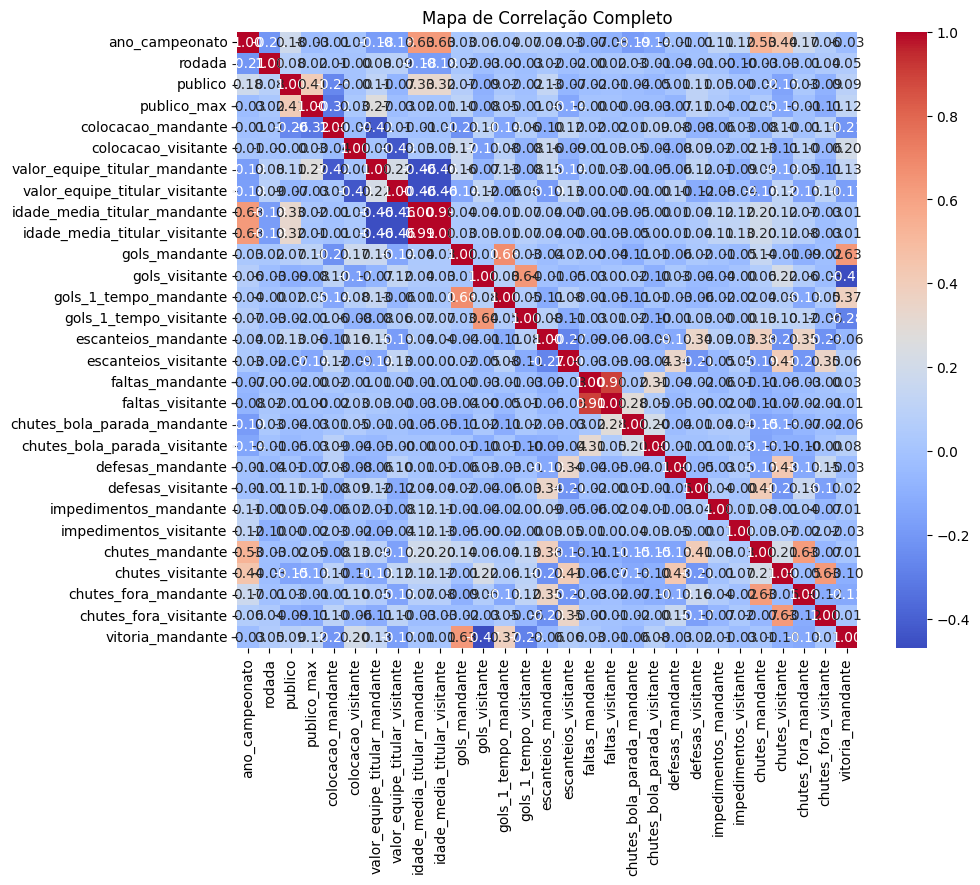

In [45]:
# Verificar se há colunas numéricas suficientes para gerar o mapa de calor
if df_numerico.empty:
    print("Erro: Não há colunas numéricas no DataFrame para gerar o mapa de calor.")
else:
    # Gerar o mapa de calor
    plt.figure(figsize=(10, 8))  # Ajustar o tamanho da figura, se necessário
    sns.heatmap(df_numerico.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Mapa de Correlação Completo')
    plt.show()

In [47]:
# Modelagem de IA (ML)
# Preparação dos Dados para Regressão
df_ml = df[['publico', 'valor_equipe_titular_mandante', 'gols_mandante']]
X_reg = df_ml[['valor_equipe_titular_mandante']]
y_reg = df_ml['publico']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [48]:
# Modelo de Regressão
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

In [49]:
print("\nMétricas de Regressão:")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_reg):.2f}")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")


Métricas de Regressão:
MAE: 12979.93
MSE: 251129306.12


In [50]:
# Preparação dos Dados para Classificação
df_clf = df[['gols_mandante', 'gols_visitante', 'colocacao_mandante']]
df_clf['vitoria_mandante'] = (df_clf['gols_mandante'] > df_clf['gols_visitante']).astype(int)
X_clf = df_clf[['gols_mandante', 'gols_visitante']]
y_clf = df_clf['vitoria_mandante']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

<ipython-input-50-12adad03dd11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clf['vitoria_mandante'] = (df_clf['gols_mandante'] > df_clf['gols_visitante']).astype(int)


In [51]:
# Modelo de Classificação
clf_model = LogisticRegression()
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)

In [53]:
print("\nMétricas de Classificação:")
print(f"Acurácia: {accuracy_score(y_test_clf, y_pred_clf):.2f}")


Métricas de Classificação:
Acurácia: 1.00


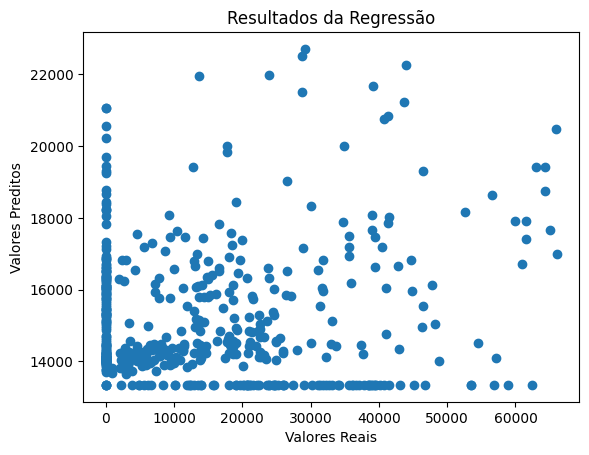

In [56]:
# Visualização dos Resultados dos Modelos
plt.scatter(y_test_reg, y_pred_reg)
plt.title('Resultados da Regressão')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.show()

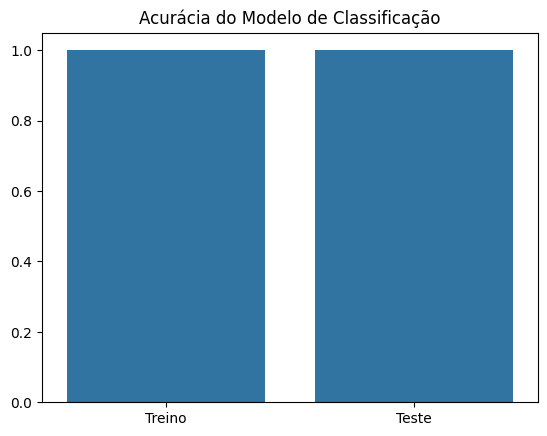

In [57]:
sns.barplot(x=['Treino', 'Teste'], y=[clf_model.score(X_train_clf, y_train_clf), clf_model.score(X_test_clf, y_test_clf)])
plt.title('Acurácia do Modelo de Classificação')
plt.show()

In [58]:
# Conclusão
print("\nConclusão:")
print("- O time com maior média de público foi identificado, assim como as relações entre várias variáveis do dataset.")
print("- A regressão apresentou um erro médio absoluto de {:.2f} para prever público baseado no valor da equipe titular.")
print("- A classificação teve uma acurácia de {:.2f}, indicando que o modelo é razoável para prever vitórias do mandante.")



Conclusão:
- O time com maior média de público foi identificado, assim como as relações entre várias variáveis do dataset.
- A regressão apresentou um erro médio absoluto de {:.2f} para prever público baseado no valor da equipe titular.
- A classificação teve uma acurácia de {:.2f}, indicando que o modelo é razoável para prever vitórias do mandante.
